# 타이타닉 실습

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False


In [4]:
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Pretendard'
# plt.style.use('bold')

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 처음 5개 행 보기
print("타이타닉 데이터 미리보기:")
print(titanic.head())

# 데이터셋 정보 확인
print("\n데이터셋 정보:")
print(titanic.info())

# 데이터 요약 통계
print("\n데이터 요약 통계:")
print(titanic.describe())

타이타닉 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0 

In [5]:
def get_data_profile(df: pd.DataFrame, target_col=None):
    """종합적인 데이터 프로파일링 함수"""
    print('=' * 50)
    print('종합 데이터 품질 리포트')
    print('=' * 50)

    # 1. 기본 통계
    print(f'\n1. 기본정보')
    print(f'- 데이터 크기: {df.shape[0]}행 x {df.shape[1]}열')
    print(f'- 메모리 사용량: {df.memory_usage(deep=True).sum()/1024**2:.2f}mb')
    print(f'- 수치형 변수: {len(df.select_dtypes(include=['number']).columns)}개')
    print(f'- 범주형 변수: {len(df.select_dtypes(include=['object']).columns)}개')

    # 2. 결측값 분석
    print(f'\n2. 결측값 분석')
    missing_info = df.isnull().sum()
    m_pct = (missing_info / len(df)) * 100
    if missing_info.sum() == 0:
        print('결측값 없음. 완전')
    else:
        missing_sum = pd.DataFrame({
            '결측수': missing_info,
            '결측율(%)': m_pct,
        }).round(2)
        missing_sum = missing_sum[missing_sum['결측수'] > 0]
        display(missing_sum)

    # 3. 데이터 타입별 분석

get_data_profile(titanic)

종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 891행 x 15열
- 메모리 사용량: 0.27mb
- 수치형 변수: 6개
- 범주형 변수: 5개

2. 결측값 분석


,결측수,결측율(%)
age,177,19.87
embarked,2,0.22
deck,688,77.22
embark_town,2,0.22


생존률 기본 분석
생존자: 342, 사망자: 549


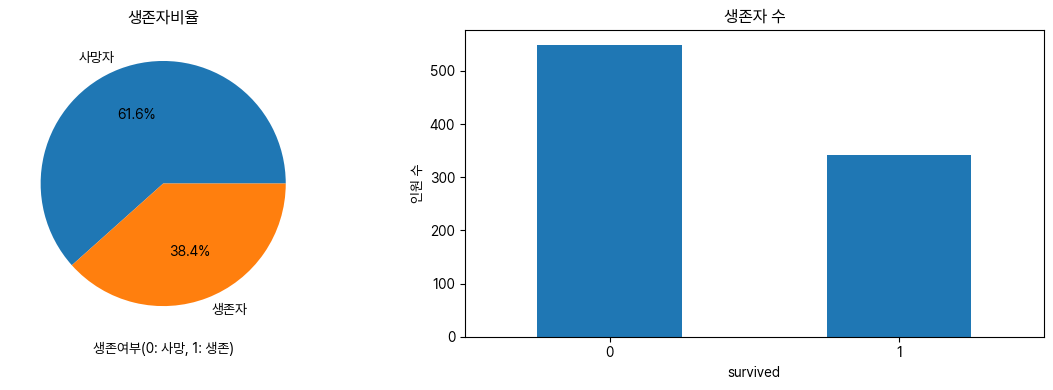

In [69]:
# 2. 생존률 기본 분석
print('생존률 기본 분석')
survival_rate = titanic['survived'].mean()

# 생존자/사망자 분포
dead, survivor = titanic['survived'].value_counts()
print(f'생존자: {survivor}, 사망자: {dead}')

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
a1, a2 = axes
# 사망 생존자 파이그래프
s_counts = titanic['survived'].value_counts()
a1.pie(s_counts, labels=('사망자', '생존자'), autopct='%1.1f%%')
a1.set_title('생존자비율')

# 생존자 막대그래프
s_counts.plot(kind='bar')
a2.set_title('생존자 수')
a1.set_xlabel('생존여부(0: 사망, 1: 생존)')
a2.set_ylabel('인원 수')
a2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
# 결측치 & 이상치 처리

titanic.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


      sex  survived
0  female  0.742038
1    male  0.188908
=== 객실 등급별 생존율 ===


KeyError: 'mean'

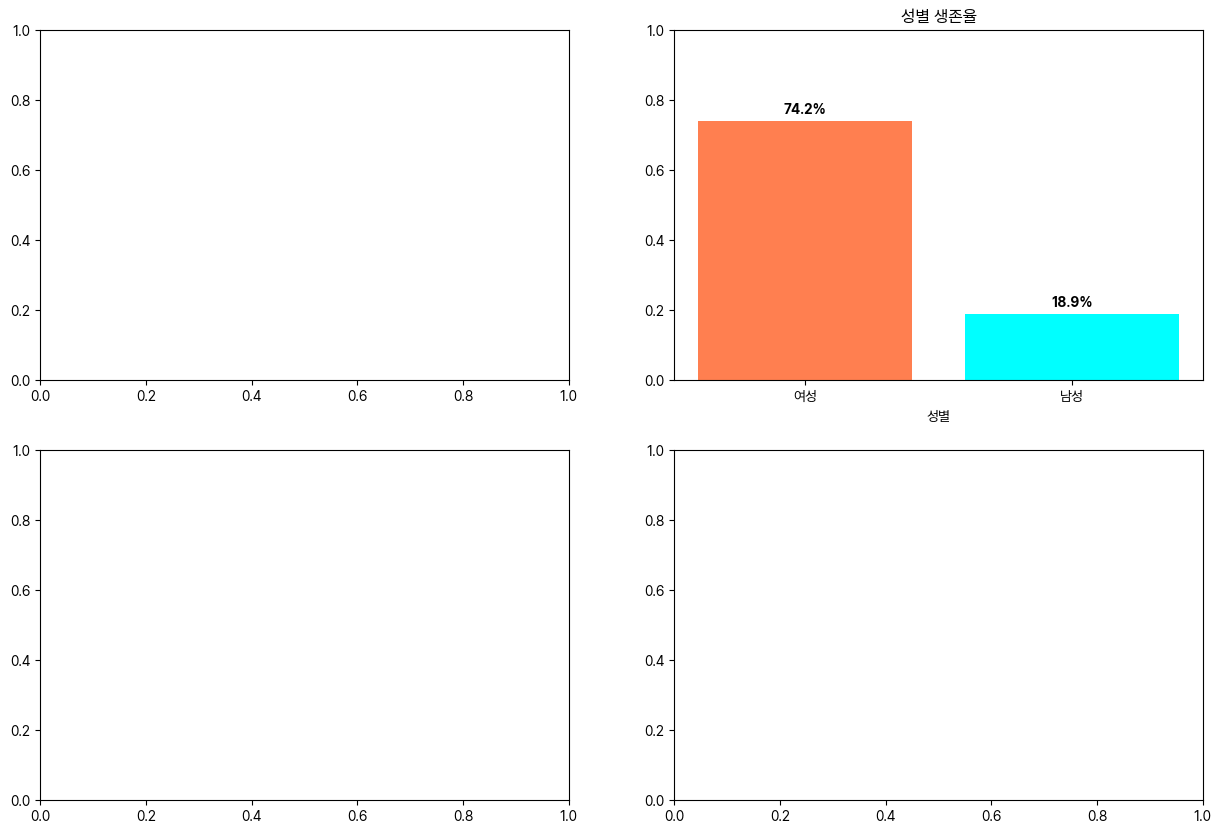

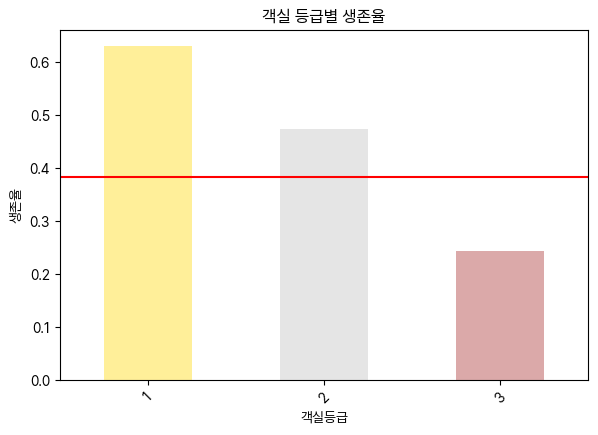

In [114]:
# 쌤 답변
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

# 핵심 변수별 생존률 분석

plt.figure(figsize = (15, 10))
# 1. 객실 등급별 생존률
pclass_sr = titanic.groupby('pclass')['survived'].mean()
plt.subplot(2, 2, 1)
pclass_sr.plot(kind='bar', color=['gold', 'silver', 'brown'], alpha=0.4)
plt.xticks(rotation = 45)
plt.title('객실 등급별 생존율')
plt.xlabel('객실등급')
plt.ylabel('생존율')
plt.axhline(y = titanic['survived'].mean(), color='red')

# 1.1. 요금도 해보면 어떨까?

# 2. 성별 생존률
sex_sr = titanic.groupby('sex')['survived'].mean().reset_index()
sex_sr.columns=['idx', 'value']
# sex_sr = titanic.groupby('sex')['survived'].mean().reset_index().set_axis(['idx', 'value'],axis=1)
# 같은 방법.
# print(sex_sr.reset_index())
sex_sr = titanic.groupby('sex')['survived'].mean()
print(sex_sr.reset_index())
a2.bar(range(len(sex_sr)), sex_sr, color = ['coral', 'cyan'])
a2.set_title('성별 생존율')
a2.set_xlabel('성별')
a2.set_xticks(range(len(sex_sr)))
a2.set_xticklabels(['여성', '남성'])
a2.set_ylim(0, 1)

for idx, value in enumerate(sex_sr):
    #       x좌표,   y좌표
    a2.text(idx, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

print('=== 객실 등급별 생존율 ===')
for idx, row in sex_sr.reset_index().iterrows():
    print(f'{idx} 등급: {row['mean']:.1%} - {row['sum']} / {row['count']}명')
# for bar in sex_sr:
#     height = bar.get_height()
#     a2.text(
#         bar.get_x() + bar.get_width() / 2,  # x 위치: 막대 가운데
#         height + 0.02,                     # y 위치: 막대보다 살짝 위
#         f"{height:.2f}",                    # 표시할 텍스트 (소수 둘째자리)
#         ha='center', va='bottom', fontsize=10
#     )

# plt.subplot(2, 2, 2)
# sex_sr.plot(kind='bar')
# plt.xticks(rotation = 45)
# plt.title('')
# plt.axhline(y = titanic['survived'].mean(), color='red')

# 3. 나이 생존률(연령대 별)
titanic['age_group'] = titanic['age'].apply(lambda x: "10대 미만" if x < 10 else f"{x // 10 * 10}대")
ag_sr = titanic.groupby('age_group')['survived'].mean()
plt.subplot(2, 2, 3)
ag_sr.plot(kind='bar')
plt.xticks(rotation = 45)
plt.title('')
plt.axhline(y = titanic['survived'].mean(), color='red')

# 4. 조합 분석: 성별 x 객실 등급
s_p_sr = titanic.groupby(['sex', 'pclass'])['survived'].mean().unstack()
print(s_p_sr)
plt.subplot(2, 2, 4)
sns.heatmap(s_p_sr, annot=True, fmt='.3f', cmap='Purples')
plt.xticks(rotation = 45)
plt.title('')

plt.tight_layout()
plt.show()

In [ ]:


# 핵심 변수별 생존률 분석
# 1. 객실 등급별 생존률(총원, 생존, 평균)
pclass_survival = titanic.groupby('pclass')['survived']

In [122]:
# 분석결과 보고
# titanic['survived'].mean()
pclass_sr.reset_index()

from scipy.stats import chi2_contingency    # 우연성~?~?~?~?

# 카이제곱 독립성 검정
sex_survival_ct = pd.crosstab(titanic['sex'], titanic['survived'])
chi2, p_value, dof, expected = chi2_contingency(sex_survival_ct)\

if p_value < 0.05:
    print('성별-생존율 관련 있음')
else:
    print('관련 없음')

성별-생존율 관련 있음
